# Proyek Analisis Data: Bike Sharing Dataset

---


- **Nama:** Rizki Wahyu Nurcahyani F
- **Email:** a123xbf441@devacademy.id
- **ID Dicoding:** rizkiwnf

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim(season) terhadap jumlah penyewaan sepeda?
2. Apakah ada perbedaan pola penyewaan antara hari kerja dan sewaktu libur?
3. Adakah bulan yang diminati oleh pengguna, dan kenapa?
4. Bagaimana hubungan antara suhu dan jumlah penyewaan sepeda?



## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

*Load Table Day.csv*

In [5]:
day_df = pd.read_csv("data/data_1.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
day_df[['dteday', 'weekday', 'holiday', 'workingday']].head(10)


,dteday,weekday,holiday,workingday
0,2011-01-01,6,0,0
1,2011-01-02,0,0,0
2,2011-01-03,1,0,1
3,2011-01-04,2,0,1
4,2011-01-05,3,0,1
5,2011-01-06,4,0,1
6,2011-01-07,5,0,1
7,2011-01-08,6,0,0
8,2011-01-09,0,0,0
9,2011-01-10,1,0,1


*Load Table Hour.csv*

In [7]:
hour_df = pd.read_csv("data/data_2.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada data tabel day.csv disimpan dalam variabel day_df. data ini berisikan mengenai kumpulan atau jumlah pengguna sepeda setiap hari. dalam data tercatat sebanyak 731 hari dengan rentang waktu dari 2011 hingga 2012.

- Pada data tabel hour.csv disimpan dalam variabel hour_df. data ini berisikan mengenai kumpulan atau jumlah pengguna sepeda setiap jam. dalam data tercatat sebanyak 17379 jam dengan rentang waktu dari 2011 hingga 2012.

### Assessing Data

*Table day.csv*

In [8]:
print(day_df.info())
print("\nJumlah Data yang NA/kosong")
print(day_df.isna().sum())
print("\nJumlah Data yang Null/kosong")
print(day_df.isnull().sum())
print("\nApakah ada data duplikat")
print(day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah Data yang NA/kosong
instant       0
dteday        0
season        0
yr          

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

*Tabel day.csv*
- Setelah dilakukan pengecekkan pada tabel day.csv tidak terdapat missing value, atau data duplikat. data tergolong bersih.
- Namun ada yang kurang dikarenakan pada kolom dteday harusnya bertipe Datetime, pada tabel ini bertipe object, sehingga nanti dibutuhkan untuk pengubahan ke format datetime

*Tabel hour.csv*

In [9]:
print(hour_df.info())
print("\nJumlah Data yang NA/kosong")
print(hour_df.isna().sum())
print("\nJumlah Data yang Null/kosong")
print(hour_df.isnull().sum())
print("\nApakah ada data duplikat")
print(hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Jumlah Data yang NA/kosong
instant       0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

*Tabel hour.csv*
- Setelah dilakukan pengecekkan pada tabel hour.csv tidak terdapat missing value, atau data duplikat. data tergolong bersih.
- Namun ada yang kurang dikarenakan pada kolom dteday harusnya bertipe Datetime, pada tabel ini bertipe object, sehingga nanti dibutuhkan untuk pengubahan ke format datetime

### Cleaning Data

In [10]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada data tabel day.csv setelah dilakukan pengecekan sebelumnya, tidak memiliki masalah seperti duplikat data, missing value. Namun permasalahannya lebih ke tipe datanya. pada kolom dteday sebelumnya adalah object, dan diubah menjadi datetime. dan pada tahap ini, tipe data tersebut diubah menjadi datetime. hal ini juga dilakukan untuk tabel hour.csv.

## Exploratory Data Analysis (EDA)

### Explore day.csv

In [12]:
day_season = day_df.groupby("season")["cnt"].agg(["mean", "sum"]).reset_index()
day_season.index = day_season.index + 1
day_season["season"] = day_season.season.apply(lambda x: "Spinger" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
day_season

,season,mean,sum
1,Spinger,2604.132597,471348
2,Summer,4992.331522,918589
3,Fall,5644.303191,1061129
4,Winter,4728.162921,841613


**Insight:**
- Pada data tabel day.csv kolom season, dilakukan pengecekan sesuai dengan pertanyaan. apakah musim berpengaruh pada penyewa sepeda. dan didalam tabel terlihat bila rata-rata perhari itu yang paling banyak musim gugur atau fall. hal ini mungkin diakibatkan karena suhu yang nyaman dan cuaca yang cerah.

In [13]:
day_workingday = day_df.groupby("workingday")["cnt"].agg(["mean", "sum"]).reset_index()
day_holiday = day_df.groupby("holiday")["cnt"].agg(["mean", "sum"]).reset_index()
day_weekday = day_df.groupby("weekday")["cnt"].agg(["mean", "sum"]).reset_index()
day_weekday["weekday"] = day_weekday.weekday.apply(lambda x: "Monday" if x == 1 else ("Tuesday" if x == 2
                                                                                else ("Wednesday" if x == 3
                                                                                else ("Thursday" if x == 4
                                                                                else ("Friday" if x == 5
                                                                                else ("Saturday" if x == 6
                                                                                else "Sunday"))))))
day_workingday["workingday"] = day_workingday.workingday.apply(lambda x: "No" if x == 0 else "Yes")
day_holiday["holiday"] = day_holiday.holiday.apply(lambda x: "No" if x == 0 else "Yes")


In [14]:
day_workingday

,workingday,mean,sum
0,No,4330.168831,1000269
1,Yes,4584.820000,2292410


In [15]:
day_holiday

,holiday,mean,sum
0,No,4527.104225,3214244
1,Yes,3735.000000,78435


In [16]:
day_weekday

,weekday,mean,sum
0,Sunday,4228.828571,444027
1,Monday,4338.123810,455503
2,Tuesday,4510.663462,469109
3,Wednesday,4548.538462,473048
4,Thursday,4667.259615,485395
5,Friday,4690.288462,487790
6,Saturday,4550.542857,477807


**Insight:**
- Pada data tabel day.csv kolom weekday, dilakukan pengecekan sesuai dengan pertanyaan. apakah ada perbedaan pola hari untuk penyewa. penyewa justru lebih cenderung menyewa sepeda pada hari kerja dibanding dengan hari libur seperti minggu. terlihat bila jumlah penyewa di hari kamis(thursday) dan jum'at(friday) cenderung lebih banyak.
- kemudian pada kolom holiday, telihat bila dia tidak libur(masuk) cenderung penyewanya lebih banyak dibanding pada saat libur
- kemudian pada kolom workingday, telihat bila jika harinya itu kerja atau working day itu lebih banyak dibanding dengan hari liburnya.

In [17]:
day_monthly = day_df.groupby("mnth")["cnt"].agg(["mean", "sum"]).reset_index()
day_monthly["mnth"] = day_monthly.mnth.apply(lambda x: "January" if x == 1 else ("February" if x == 2
                                                                                else ("March" if x == 3
                                                                                else ("April" if x == 4
                                                                                else ("May" if x == 5
                                                                                else ("June" if x == 6
                                                                                else ("July" if x == 7
                                                                                else ("August" if x == 8
                                                                                else ("September" if x == 9
                                                                                else ("October" if x == 10
                                                                                else ("November" if x == 11
                                                                                else "December")))))))))))

In [18]:
day_monthly

,mnth,mean,sum
0,January,2176.338710,134933
1,February,2655.298246,151352
2,March,3692.258065,228920
3,April,4484.900000,269094
4,May,5349.774194,331686
5,June,5772.366667,346342
6,July,5563.677419,344948
7,August,5664.419355,351194
8,September,5766.516667,345991
9,October,5199.225806,322352


**Insight:**
- Pada data tabel day.csv kolom mnth, dilakukan pengecekan sesuai dengan pertanyaan. apakah ada bulan yang diminati oleh penyewa sepeda. ternyata setelah dilakukan eksplorasi, bulan mei(may) hingga bulan oktober(october) termasuk tinggi peminat orang yang menyewa sepeda.
- sebaliknya untuk bulan desember(december) sampai bulan maret(march) justru sedikit peminatnya.
- Bbedasarkan pembagian musim terlihat bila musim panas dan gugur itu peminatnya lebih banyak dibanding musim dingin dan semi. Hal ini dapat dilihat pada [Informasi](https://www.vistaeducation.com/country/us) berikut :
  * Musim panas: Juni - Agustus
  * Musim Gugur: September - November
  * Musim dingin: Desember - Februari
  * Musim Semi: Maret - Mei




In [19]:
day_temp = day_df[['temp', 'cnt']].corr()
day_temp

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


**Insight:**
- Dari hasil korelasi antara temprature suhu dengan jumlah penyewa sepeda didapatkan hasil bila semakin tinggi suhu, semakin banyak orang menyewa sepeda. namun hal ini perlu dikaji lebih lanjut dikarenakan faktor semakin banyak penyewa sepeda bukan hanya dari temprature. dapat juga dari cuaca, dll.

### Explore hour.csv

In [20]:
hour_season = hour_df.groupby("season")["cnt"].agg(["mean", "sum"]).reset_index()
hour_season.index = hour_season.index + 1
hour_season["season"] = hour_season.season.apply(lambda x: "Spinger" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
hour_season

,season,mean,sum
1,Spinger,111.114569,471348
2,Summer,208.344069,918589
3,Fall,236.016237,1061129
4,Winter,198.868856,841613


**Insight:**
- Pada data tabel hour.csv kolom season, dilakukan pengecekan sesuai dengan pertanyaan. apakah musim berpengaruh pada penyewa sepeda. dan didalam tabel terlihat bila rata-rata perhari itu yang paling banyak musim gugur atau fall. hal ini mungkin diakibatkan karena suhu yang nyaman dan cuaca yang cerah.

In [21]:
hour_workingday = hour_df.groupby("workingday")["cnt"].agg(["mean", "sum"]).reset_index()
hour_holiday = hour_df.groupby("holiday")["cnt"].agg(["mean", "sum"]).reset_index()
hour_weekday = hour_df.groupby("weekday")["cnt"].agg(["mean", "sum"]).reset_index()
hour_weekday["weekday"] = hour_weekday.weekday.apply(lambda x: "Monday" if x == 1 else ("Tuesday" if x == 2
                                                                                else ("Wednesday" if x == 3
                                                                                else ("Thursday" if x == 4
                                                                                else ("Friday" if x == 5
                                                                                else ("Saturday" if x == 6
                                                                                else "Sunday"))))))
hour_workingday["workingday"] = hour_workingday.workingday.apply(lambda x: "No" if x == 0 else "Yes")
hour_holiday["holiday"] = hour_holiday.holiday.apply(lambda x: "No" if x == 0 else "Yes")


In [22]:
hour_workingday

,workingday,mean,sum
0,No,181.405332,1000269
1,Yes,193.207754,2292410


In [23]:
hour_holiday

,holiday,mean,sum
0,No,190.42858,3214244
1,Yes,156.87000,78435


In [24]:
hour_weekday

,weekday,mean,sum
0,Sunday,177.468825,444027
1,Monday,183.744655,455503
2,Tuesday,191.238891,469109
3,Wednesday,191.130505,473048
4,Thursday,196.436665,485395
5,Friday,196.135907,487790
6,Saturday,190.209793,477807


**Insight:**
- Pada data tabel hour.csv kolom weekday, dilakukan pengecekan sesuai dengan pertanyaan. apakah ada perbedaan pola hari untuk penyewa. penyewa justru lebih cenderung menyewa sepeda pada hari kerja dibanding dengan hari libur seperti minggu. terlihat bila jumlah penyewa di hari kamis(thursday) dan jum'at(friday) cenderung lebih banyak.
- kemudian pada kolom holiday, telihat bila dia tidak libur(masuk) cenderung penyewanya lebih banyak dibanding pada saat libur
- kemudian pada kolom workingday, telihat bila jika harinya itu kerja atau working day itu lebih banyak dibanding dengan hari liburnya.

In [25]:
hour_monthly = hour_df.groupby("mnth")["cnt"].agg(["mean", "sum"]).reset_index()
hour_monthly["mnth"] = hour_monthly.mnth.apply(lambda x: "January" if x == 1 else ("February" if x == 2
                                                                                else ("March" if x == 3
                                                                                else ("April" if x == 4
                                                                                else ("May" if x == 5
                                                                                else ("June" if x == 6
                                                                                else ("July" if x == 7
                                                                                else ("August" if x == 8
                                                                                else ("September" if x == 9
                                                                                else ("October" if x == 10
                                                                                else ("November" if x == 11
                                                                                else "December")))))))))))

In [26]:
hour_monthly

,mnth,mean,sum
0,January,94.424773,134933
1,February,112.865026,151352
2,March,155.410726,228920
3,April,187.260960,269094
4,May,222.907258,331686
5,June,240.515278,346342
6,July,231.819892,344948
7,August,238.097627,351194
8,September,240.773138,345991
9,October,222.158511,322352


**Insight:**
- Pada data tabel hour.csv kolom mnth, dilakukan pengecekan sesuai dengan pertanyaan. apakah ada bulan yang diminati oleh penyewa sepeda. ternyata setelah dilakukan eksplorasi, bulan mei(may) hingga bulan oktober(october) termasuk tinggi peminat orang yang menyewa sepeda.
- sebaliknya untuk bulan desember(december) sampai bulan maret(march) justru sedikit peminatnya.
- Bbedasarkan pembagian musim terlihat bila musim panas dan gugur itu peminatnya lebih banyak dibanding musim dingin dan semi. Hal ini dapat dilihat pada [Informasi](https://www.vistaeducation.com/country/us) berikut :
  * Musim panas: Juni - Agustus
  * Musim Gugur: September - November
  * Musim dingin: Desember - Februari
  * Musim Semi: Maret - Mei




In [27]:
hour_temp = hour_df[['temp', 'cnt']].corr()
hour_temp

,temp,cnt
temp,1.000000,0.404772
cnt,0.404772,1.000000


**Insight:**
- Dari hasil korelasi antara temprature suhu dengan jumlah penyewa sepeda didapatkan hasil bila semakin tinggi suhu, semakin banyak orang menyewa sepeda. namun hal ini perlu dikaji lebih lanjut dikarenakan faktor semakin banyak penyewa sepeda bukan hanya dari temprature. dapat juga dari cuaca, dll.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim(season) terhadap jumlah penyewaan sepeda?

C:\Users\HP\AppData\Local\Temp\ipykernel_25300\4034307776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


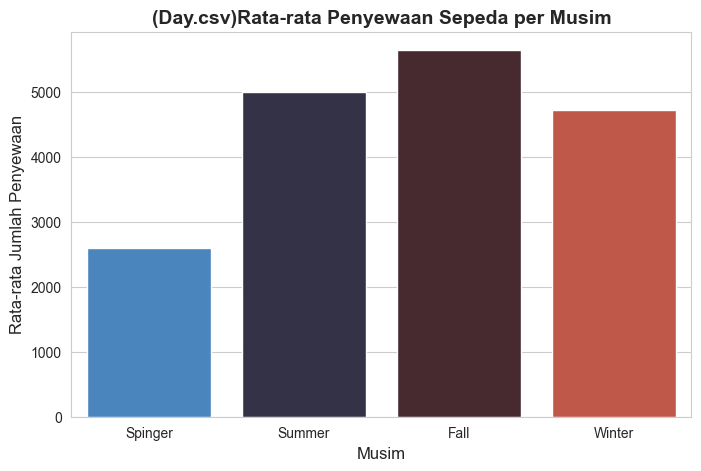

In [28]:
sns.set_style("whitegrid")
custom_palette = sns.color_palette("icefire", n_colors=4)
plt.figure(figsize=(8, 5))
sns.barplot(
    x="season",
    y="mean",
    data=day_season,
    palette=custom_palette
)
plt.title("(Day.csv)Rata-rata Penyewaan Sepeda per Musim", fontsize=14, fontweight="bold")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_25300\1827036888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


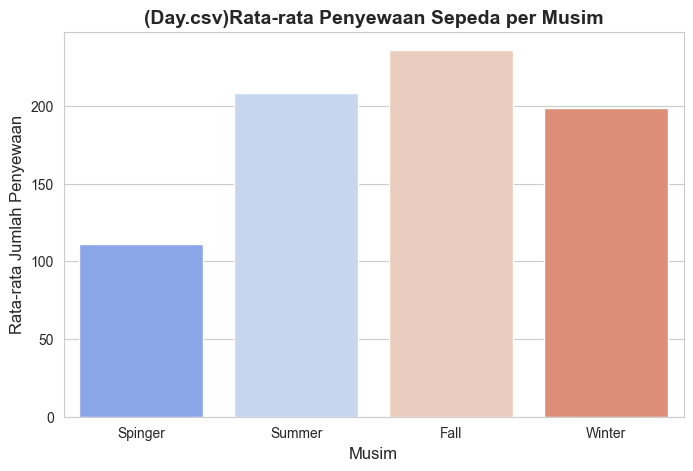

In [29]:
sns.set_style("whitegrid")
custom_palette = sns.color_palette("coolwarm", n_colors=4)
plt.figure(figsize=(8, 5))
sns.barplot(
    x="season",
    y="mean",
    data=hour_season,
    palette=custom_palette
)
plt.title("(Day.csv)Rata-rata Penyewaan Sepeda per Musim", fontsize=14, fontweight="bold")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_25300\3879580537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


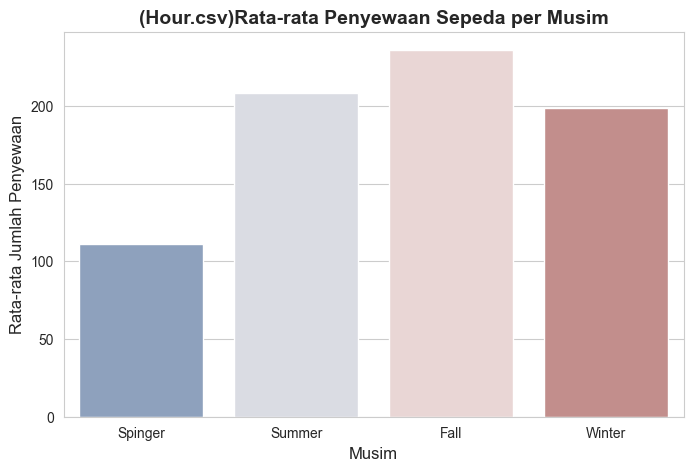

In [30]:
sns.set_style("whitegrid")
custom_palette = sns.color_palette("vlag", n_colors=4)
plt.figure(figsize=(8, 5))
sns.barplot(
    x="season",
    y="mean",
    data=hour_season,
    palette=custom_palette
)
plt.title("(Hour.csv)Rata-rata Penyewaan Sepeda per Musim", fontsize=14, fontweight="bold")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.show()


**Insight:**
- Pada visualisasi dari day maupun hour, musim atau season fall menjadi rata-rata penyewaan sepeda tertinggi dari pada musim lainnya disusul dengan summer, winter, dan springer. Hal ini kemungkinan dipengaruhi oleh cuaca di musim gugur yang cenderung hangat, tidak terlalu panas dan tidak terlalu dingin. sedangkan musim semi atau spinder menjadi rata-rata penyewa yang sedikit

### Pertanyaan 2: Apakah ada perbedaan pola penyewaan antara hari kerja dan sewaktu libur?



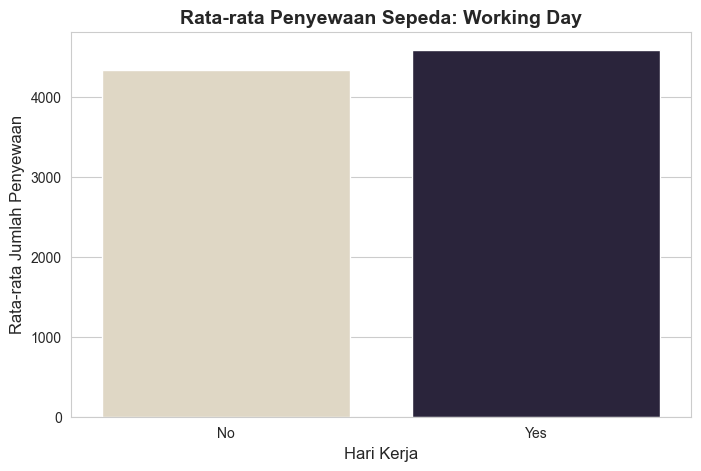

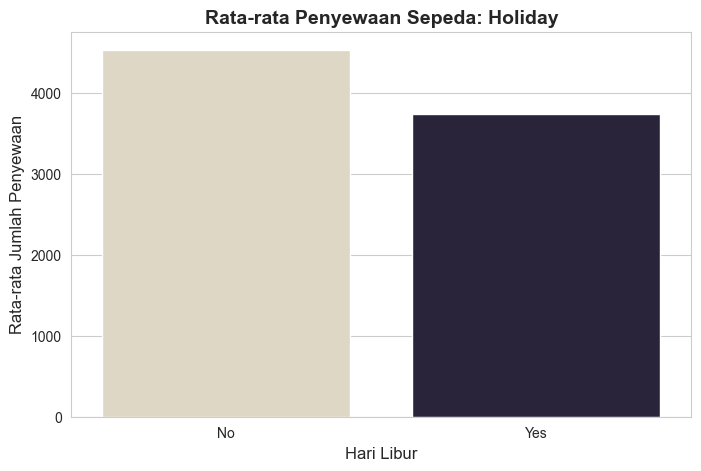

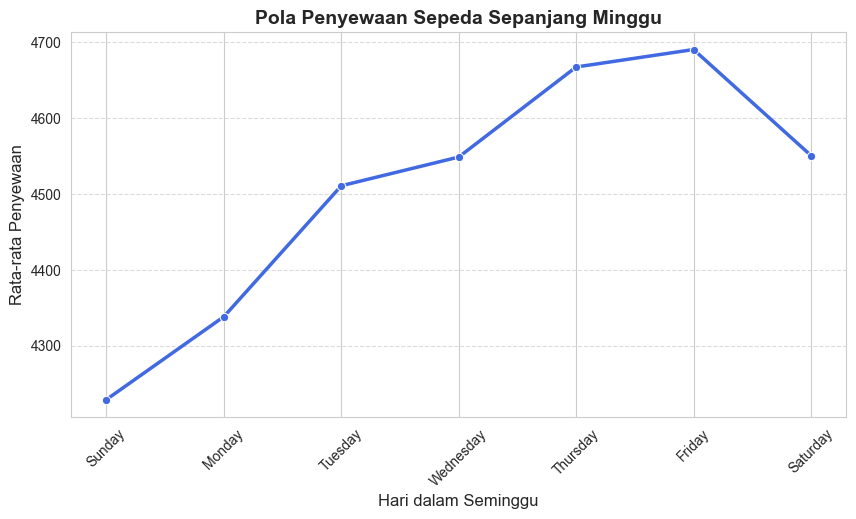

In [31]:
sns.set_style("whitegrid")
custom_palette = sns.color_palette("ch:s=-.2,r=.6", n_colors=2)
plt.figure(figsize=(8, 5))
sns.barplot(x="workingday", y="mean", data=day_workingday, hue="workingday", palette=custom_palette, legend=False)
plt.title("Rata-rata Penyewaan Sepeda: Working Day", fontsize=14, fontweight="bold")
plt.xlabel("Hari Kerja", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.show()
print("\n")

plt.figure(figsize=(8, 5))
sns.barplot(x="holiday", y="mean", data=day_holiday, hue="holiday", palette=custom_palette, legend=False)
plt.title("Rata-rata Penyewaan Sepeda: Holiday", fontsize=14, fontweight="bold")
plt.xlabel("Hari Libur", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.show()
print("\n")

plt.figure(figsize=(10, 5))
sns.lineplot(x="weekday", y="mean", data=day_weekday, marker="o", linewidth=2.5, color="royalblue")
plt.title("Pola Penyewaan Sepeda Sepanjang Minggu", fontsize=14, fontweight="bold")
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


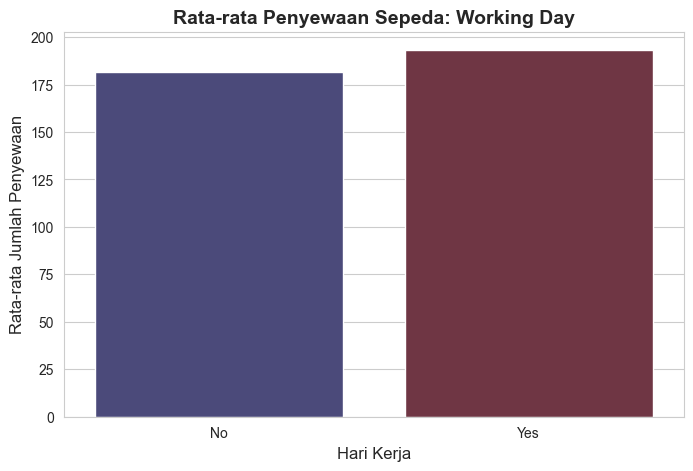

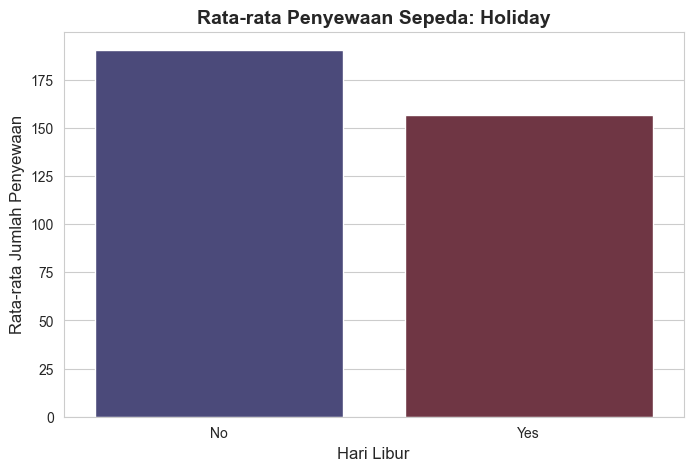

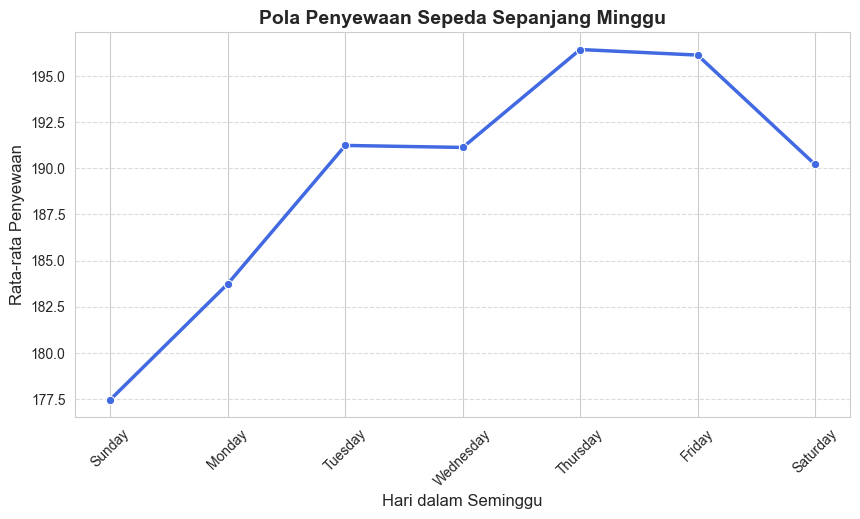

In [32]:
sns.set_style("whitegrid")
custom_palette = sns.color_palette("icefire", n_colors=2)
plt.figure(figsize=(8, 5))
sns.barplot(x="workingday", y="mean", data=hour_workingday, hue="workingday", palette=custom_palette, legend=False)
plt.title("Rata-rata Penyewaan Sepeda: Working Day", fontsize=14, fontweight="bold")
plt.xlabel("Hari Kerja", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.show()
print("\n")

plt.figure(figsize=(8, 5))
sns.barplot(x="holiday", y="mean", data=hour_holiday, hue="holiday", palette=custom_palette, legend=False)
plt.title("Rata-rata Penyewaan Sepeda: Holiday", fontsize=14, fontweight="bold")
plt.xlabel("Hari Libur", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.show()
print("\n")

plt.figure(figsize=(10, 5))
sns.lineplot(x="weekday", y="mean", data=hour_weekday, marker="o", linewidth=2.5, color="royalblue")
plt.title("Pola Penyewaan Sepeda Sepanjang Minggu", fontsize=14, fontweight="bold")
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Insight:**
- Pola penyewaan sepeda sedikit berbeda pada hari kerja maupun hari libur. pada kedua dataset yang digunakan, hari kerja cenderung lebih banyak penyewanya dari pada hari libur.
- Pada grafik working day, terlihat bahwa grafik yes, sedikit lebih tinggi dari pada grafik yang no.
- pada grafik holiday, terjadi penurunan ketika hari libur atau yes dan ketika no grafik naik.
- pada grafik ketiga yaitu grafik weekday, pada minggu-jum'at terjadi kenaikan penyewaan sepeda, dan ketika hari sabtu-minggu terjadi penurunan penyewaan sepeda.

### Pertanyaan 3: Adakah bulan yang diminati oleh pengguna, dan kenapa?



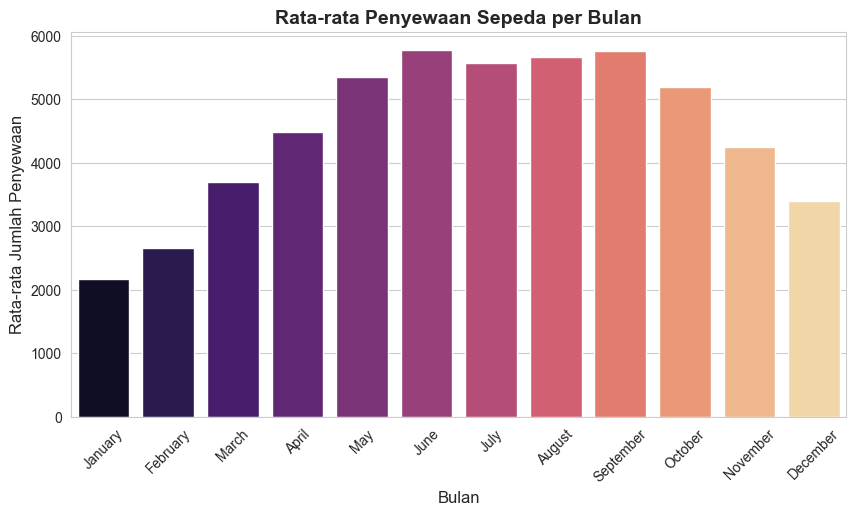

In [33]:
custom_palette = sns.color_palette("magma", n_colors=12)
plt.figure(figsize=(10, 5))
sns.barplot(
    x="mnth",
    y="mean",
    data=day_monthly,
    hue="mnth",
    palette=custom_palette
)
plt.xticks(rotation=45)
plt.title("Rata-rata Penyewaan Sepeda per Bulan", fontsize=14, fontweight='bold')
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.show()

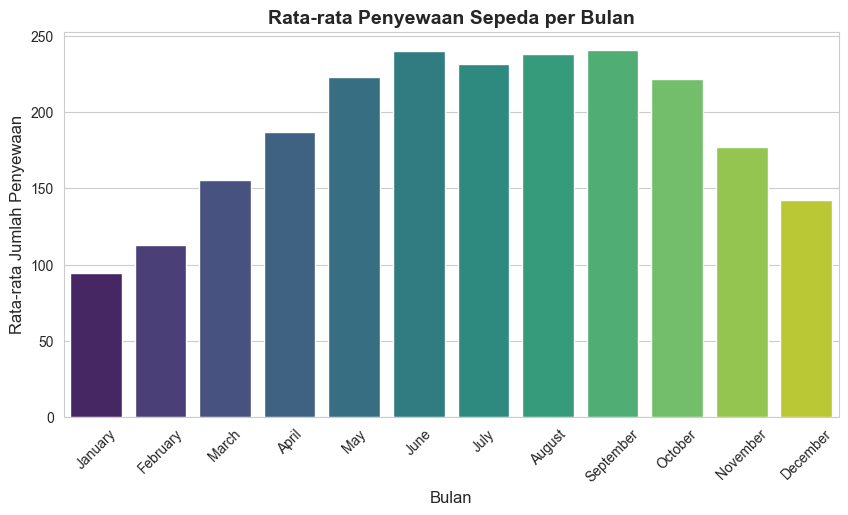

In [34]:
custom_palette = sns.color_palette("viridis", n_colors=12)
plt.figure(figsize=(10, 5))
sns.barplot(
    x="mnth",
    y="mean",
    data=hour_monthly,
    hue="mnth",
    palette=custom_palette
)
plt.xticks(rotation=45)
plt.title("Rata-rata Penyewaan Sepeda per Bulan", fontsize=14, fontweight='bold')
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.show()

**Insight:**
- Mulai pada bulan Maret sampai dengan bulan September terjadi kenaikan jumlah penyewaan sepeda. sedangkan pada bulan desember sampai januari merupakan bulan yang cukup rendah penyewaan sepedanya.
-  Hal ini kemungkinan terjadi dikarenakan cuaca dan musim yang berlaku. pada bulan desember-februari itu terjadinya musim dingin atau winter, kemudian dilanjutkan musim semi, musim panas, musim gugur.

### Pertanyaan 4: Bagaimana hubungan antara suhu dan jumlah penyewaan sepeda?



Korelasi antara suhu dan jumlah penyewaan sepeda: 0.40


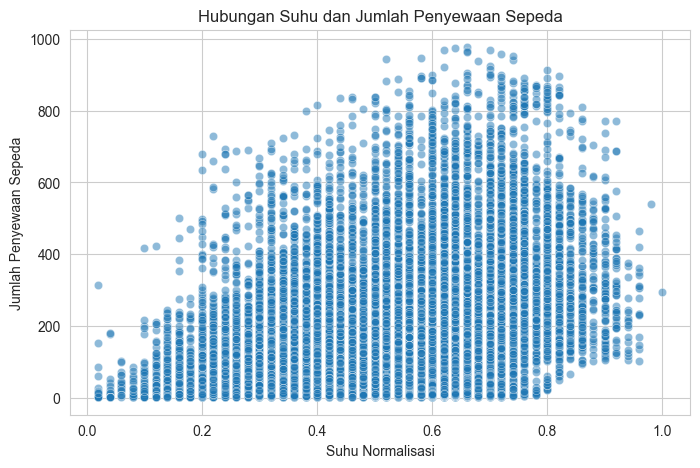

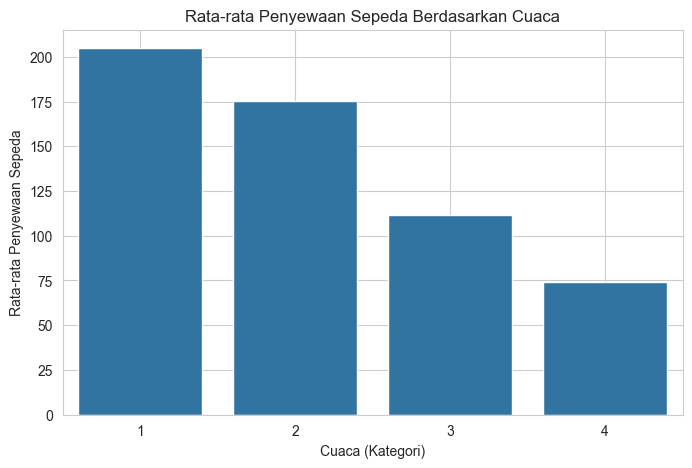

In [35]:
corr_value = hour_df[['temp', 'cnt']].corr().iloc[0, 1]
print(f"Korelasi antara suhu dan jumlah penyewaan sepeda: {corr_value:.2f}")
plt.figure(figsize=(8, 5))
sns.scatterplot(x=hour_df["temp"], y=hour_df["cnt"], alpha=0.5)
plt.title("Hubungan Suhu dan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu Normalisasi")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()
print("\n")

wind_rentals = hour_df.groupby("weathersit")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=wind_rentals)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Cuaca")
plt.xlabel("Cuaca (Kategori)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid(True)
plt.show()


Korelasi antara suhu dan jumlah penyewaan sepeda: 0.63


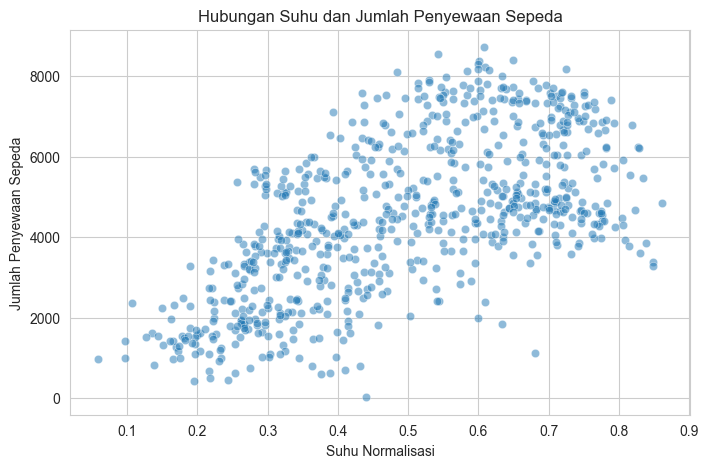

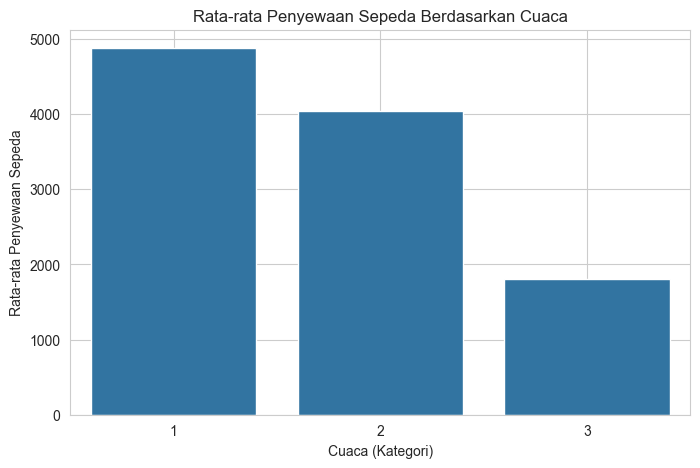

In [36]:
corr_value = day_df[['temp', 'cnt']].corr().iloc[0, 1]
print(f"Korelasi antara suhu dan jumlah penyewaan sepeda: {corr_value:.2f}")
plt.figure(figsize=(8, 5))
sns.scatterplot(x=day_df["temp"], y=day_df["cnt"], alpha=0.5)
plt.title("Hubungan Suhu dan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu Normalisasi")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()
print("\n")

wind_rentals = day_df.groupby("weathersit")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=wind_rentals)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Cuaca")
plt.xlabel("Cuaca (Kategori)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid(True)
plt.show()


**Insight:**
- Berdasarkan scatter plot pertama dan kedua, dapat dilihat bahwa ada hubungan positif antara suhu yang dinormalisasi dan jumlah penyewaan sepeda. yang mana pada saat suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat.
Peningkatan ini terjadi hingga titik tertentu, setelah itu jumlah penyewaan sepeda mulai menurun.
- Cuaca yang hangat cenderung lebih disukai oleh penyewa saat menyewa sepeda dibandingkan dengan cuaca yang dingin. ini didukung juga oleh gradik barplot yang pertama dan kedua. keduanya unggul di nomor 1 yaitu Cuaca Cerah & Berawan. kemudian disusul oleh nomor 2 berkabut dan berawan.

## Analisis Lanjutan (Opsional)

In [37]:
year_avg = day_df.groupby("yr")["cnt"].mean().reset_index()
year_avg.rename(columns={"cnt": "rata_rata_pertahun"}, inplace=True)
if "rata_rata_tahun" in day_df.columns:
    day_df.drop(columns=["rata_rata_tahun"], inplace=True)
day_df = day_df.merge(year_avg, on="yr", how="left")

In [38]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,rata_rata_pertahun
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3405.761644
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,3405.761644
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3405.761644
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3405.761644
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,3405.761644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,5599.934426
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,5599.934426
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,5599.934426
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,5599.934426


In [39]:
def categorize_rentals(cnt, avg):
    if cnt > avg * 1:
        return "Ramai"
    elif cnt < avg * 0.8:
        return "Sepi"
    else:
        return "Sedang"

day_df["Kategori_Penyewaan"] = day_df.apply(lambda row: categorize_rentals(row["cnt"], row["rata_rata_pertahun"]), axis=1)

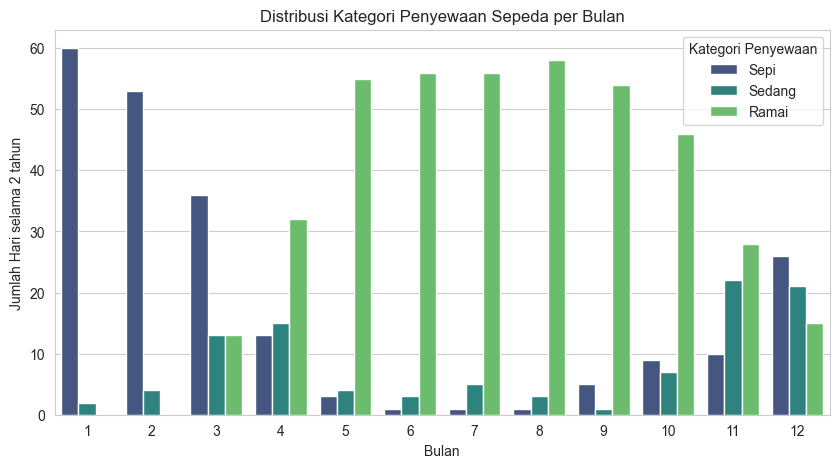

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(x=day_df["mnth"], hue=day_df["Kategori_Penyewaan"], palette="viridis")
plt.title("Distribusi Kategori Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Hari selama 2 tahun")
plt.legend(title="Kategori Penyewaan")
plt.show()

**Insight:**
Tujuan dari Pengelompokan dengan kategori "sepi", "sedang", "ramai" adalah untuk memudahkan dalam membaca bagaimana keadaan bulan tersebut. Dengan disatukannya hari dalam sebulan pada tahun 2011-2012. sehingga dalam 1 bulan setidaknya ada 60 hari. untuk grafiknya itu dibaca perhari. contohnya adalah pada bulan januari 60 hari sepi dan 2 hari sedang. kemudian untuk analisisnya seperti berikut : 
- Untuk kategori sepi, bulan januari sampai maret sangat meningkat dibandingkan dengan bulan-bulan sebelumnya. bahkan tidak ramai
- Untuk bulan yang ramai itu mulai bulan april sampai oktober. kemudian turun lagi grafiknya pada bulan oktober.


## Conclusion

1. Adanya musim sangat berpengaruh pada penyewaan sepeda. contohnya pada musim gugur atau fall, rata-rata jumlah penyewaan sepedanya tertinggi dibandingkan dengan musim lainnya. Hal ini kemungkinan disebabkan karena cuaca yang sedang hangat, tidak terlalu panas dan tidak terlalu dingin. sedangkan pada musim salju atau winter kemudian musim semi, cenderung jumlah penyewanya rendah.

2. Perbedaan hari juga berpengaruh pada penyewaan sepeda. Pada hari kerja seperti senin-jum'at penyewaannya lebih tinggi dibandingkan hari minggu atau hari libur. Saat hari libur, cenderung terjadi penurunan penyewaan sepeda. Hal ini kemungkinan disebabkan karena sepeda menjadi alat transportasi untuk pergi ke kantor atau transportasi biasa dibandingkan dengan alat untuk pergi liburan atau rekreasi.

3. Setiap bulan juga menunjukkan perbedaan minat penyewa. setelah dicari tahu, ternyata terkait dengan musim, untuk maret-september itu musim semi, panas kemudian dilanjut oleh musim gugur, ini menjadi bulan yang ramai untuk penyewa sepeda. Berbeda halnya dengan bulan desember sampai Februari karena saat itu musim dingin, sehingga kurang mendukung aktivitas untuk bersepeda. Sehingga kemungkinan Cuaca juga menjadi faktor untuk naik turunnya jumlah penyepeda.

4. Semakin tinggi suhu, semakin banyak penyewa sepeda, namun hanya sampai titik tertentu. Hal ini membuktikan bahwa penyepeda lebih suka di suhu hangat dibandingkan suhu dingin atau saat panas. Kemungkinan pada saat suhu dingin, penyepeda menggunakan kendaraan lainnya yang lebih tertutup dan lebih hangat.




##General Conclusion

1. Musim, cuaca, suhu, serta perbedaan hari kerja dan hari libur sangat berpengaruh pada intesitas dan pola dari penyewaan sepeda.
2. pada cuaca, penyewa sepeda lebih memilih untuk bersepeda di cuaca hangat
3. pada musim, penyewa sepeda lebih memilih musim gugur dan musim panas untuk bersepeda.
4. pada hari, penyewa sepeda lebih suka bersepeda pada hari kerja dari pada hari weekend atau hari libur.

Dengan hal ini dapat dijadikan peluang untuk bisnis penyewaan sepeda, kemudian dapat dilakukan promosi pada saat bulan desember-februari untuk meningkatkan jumlah penyewa sepeda.